In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Отбор параметров (дисперсионный анализ)

### Отбор параметров в процентах

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


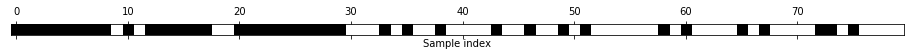

In [8]:
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index");
plt.yticks(());

### Отбор параметров в штуках

X_train.shape: (284, 80)
X_train_selected.shape: (284, 20)


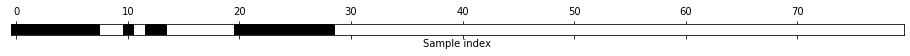

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

select = SelectKBest(k=20)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index");
plt.yticks(());

# Отбор параметров из модели (значимость по энтропии)
## Ridge сортирует признаки просто по вкладу в модель (коэф-т перед значением)

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select_m = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select_m.fit(X_train, y_train)
X_train_l1 = select_m.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


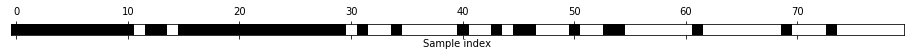

In [6]:
mask = select_m.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r');
plt.xlabel("Sample index");
plt.yticks(());

## Итеративный отбор параметров (RFE)  (пересчет после каждого выброса незнач параметра)

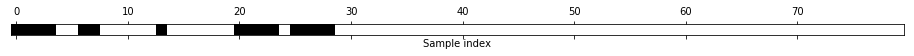

In [7]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=15)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r');
plt.xlabel("Sample index");
plt.yticks(());

In [8]:
mask

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])